In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [16]:
# Loading the Excel Employee sheet into a DataFrame
df = pd.read_excel("Employee.xlsx")

# Display the first few rows of the dataframe
print(df.head())



     EEID        Full Name                 Job Title Department  \
0  E02387      Emily Davis                Sr. Manger         IT   
1  E04105    Theodore Dinh       Technical Architect         IT   
2  E02572     Luna Sanders                  Director    Finance   
3  E02832  Penelope Jordan  Computer Systems Manager         IT   
4  E01639        Austin Vo               Sr. Analyst    Finance   

            Business Unit  Gender  Ethnicity  Age  Hire Date  Annual Salary  \
0  Research & Development  Female      Black   55 2016-04-08         141604   
1           Manufacturing    Male      Asian   59 1997-11-29          99975   
2     Speciality Products  Female  Caucasian   50 2006-10-26         163099   
3           Manufacturing  Female  Caucasian   26 2019-09-27          84913   
4           Manufacturing    Male      Asian   55 1995-11-20          95409   

   Bonus         Country       City  Exit Date  
0    0.15  United States    Seattle 2021-10-16  
1    0.00          China

In [25]:
# Summary statistics for numerical columns
print(df.describe())

               Age  Annual Salary       Bonus 
count  1000.000000    1000.000000  1000.000000
mean     44.382000  113217.365000     0.088660
std      11.246981   53545.985644     0.117856
min      25.000000   40063.000000     0.000000
25%      35.000000   71430.250000     0.000000
50%      45.000000   96557.000000     0.000000
75%      54.000000  150782.250000     0.150000
max      65.000000  258498.000000     0.400000


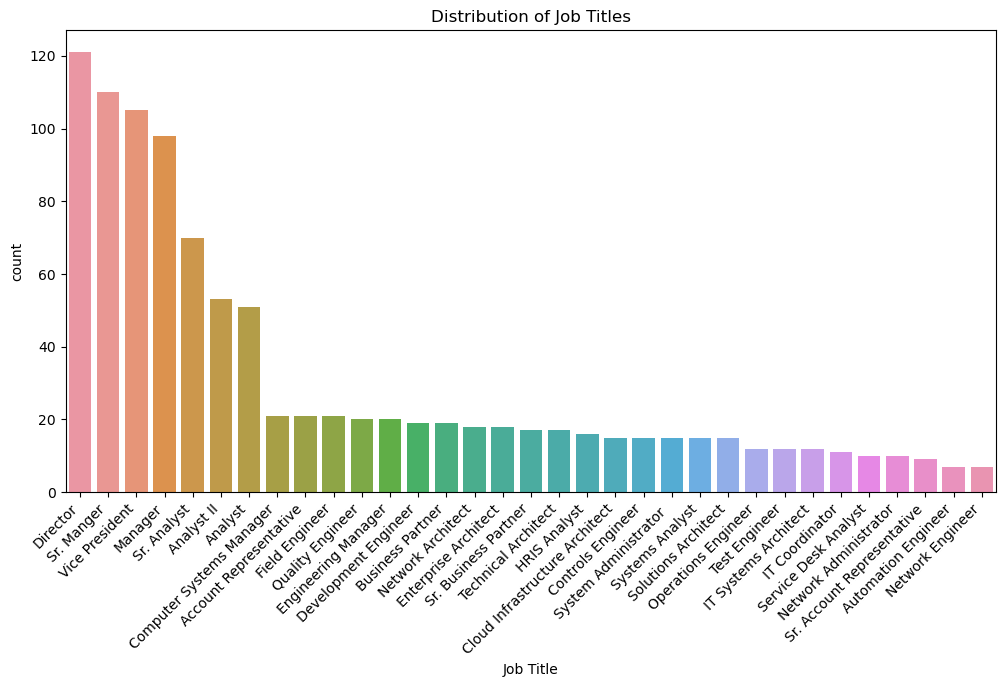

In [4]:
# Distribution of Job Titles
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Job Title', order=df['Job Title'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Job Titles')
plt.show()



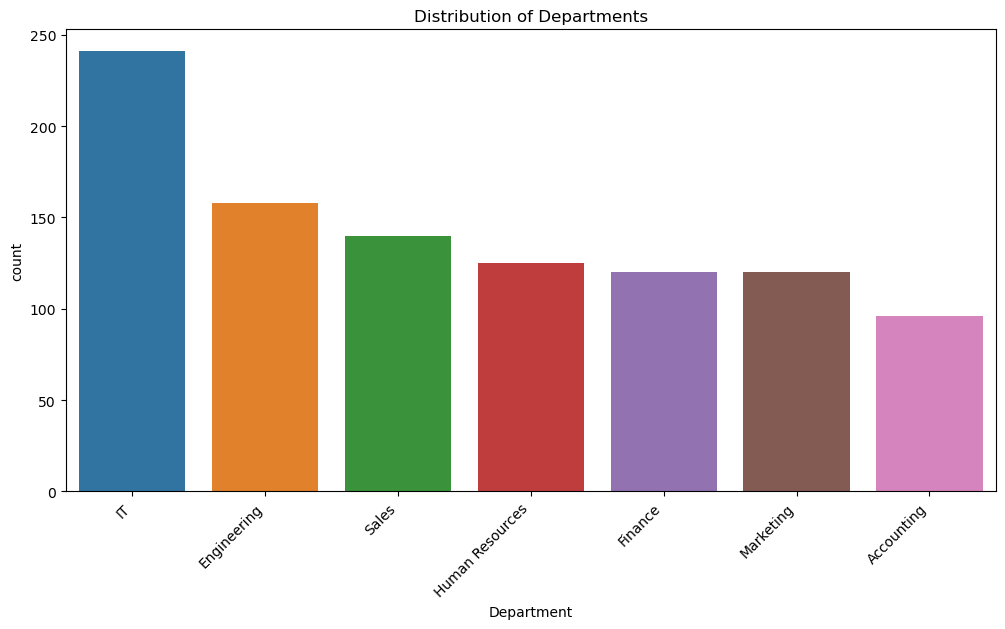

In [5]:
# Distribution of Departments
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', order=df['Department'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Departments')
plt.show()



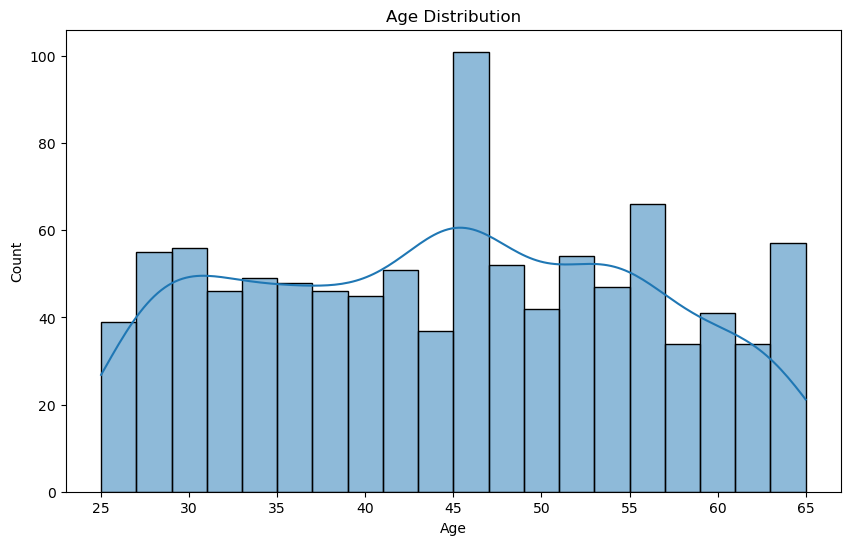

In [6]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


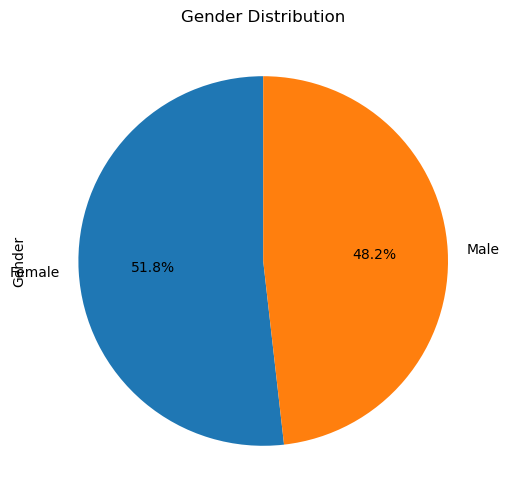

In [7]:

# Gender distribution
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()




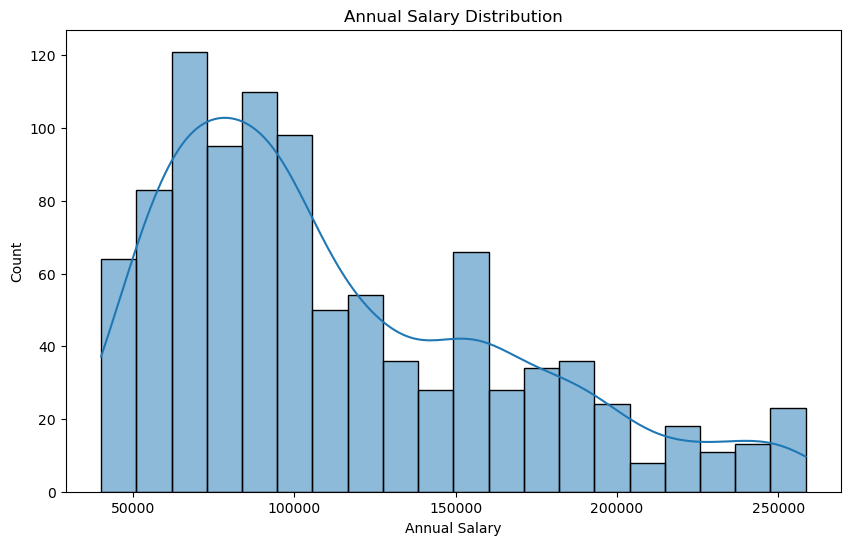

In [8]:
# Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Annual Salary', bins=20, kde=True)
plt.title('Annual Salary Distribution')
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_25936\1017005946.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


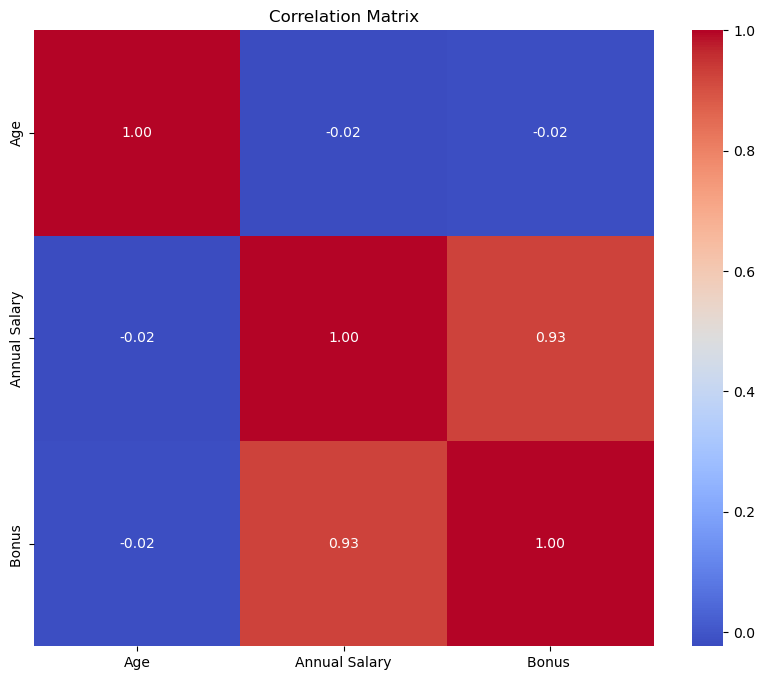

In [9]:
# Correlation matrix for numerical columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [30]:
# Data preprocessing for machine learning
# For simplicity, I prefered using (binary classification)

df['Exit'] = df['Exit Date'].notna().astype(int)
features = ['Age', 'Annual Salary', 'Bonus ']
X = df[features]
y = df['Exit']


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [36]:
# Train a simple Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:

# Predictions on the test set
y_pred = model.predict(X_test)



In [35]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.91
Confusion Matrix:
[[182   5]
 [ 13   0]]
